In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df = df.drop(["sepal length (cm)", "sepal width (cm)"], axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


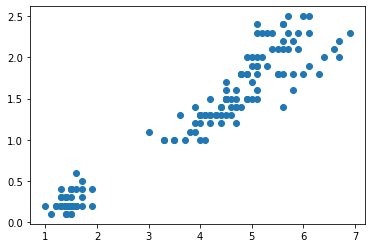

In [6]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

In [7]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(k)
    km.fit(df[["petal length (cm)", "petal width (cm)"]])
    sse.append(km.inertia_)

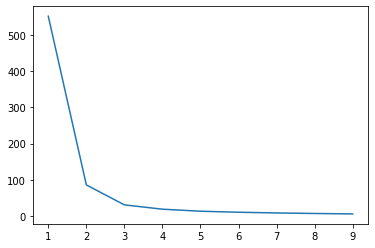

In [8]:
plt.plot(k_range, sse)

In [9]:
# On analyzing the above graph, the clusters required are 3

km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["petal length (cm)", "petal width (cm)"]])

In [10]:
df['cluster'] = y_pred
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [11]:
df.cluster.unique()

array([1, 2, 0], dtype=int32)

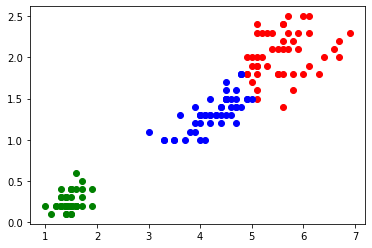

In [12]:
# Plotting the cluster graph
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color='red')
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color='green')
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], color='blue')